In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd '/content/drive/MyDrive/Colab_Notebooks/VPC_TP4'

/content/drive/MyDrive/Colab_Notebooks/VPC_TP4


In [ ]:
def image_plot(images, n_row = 1, n_col = 1, fig_size = (27, 9)):
  fig = plt.figure(figsize = fig_size)
  j = 1
  ax = np.zeros(len(images))
  for i, k in zip(images, ax):
    k = fig.add_subplot(n_row, n_col,j)
    plt.imshow(i, cmap = 'gray')
    k.set_title('Figura ' + str(j))
    j = j + 1

In [ ]:
piedras1 = cv.imread('piedras1.png', cv.IMWRITE_PAM_FORMAT_RGB)[:,:,::-1] # Cargo la imagen en RGB
piedras1 = cv.cvtColor(piedras1, cv.COLOR_RGB2GRAY)
piedras2 = cv.imread('piedras2.png', cv.IMWRITE_PAM_FORMAT_RGB)[:,:,::-1]
piedras2 = cv.cvtColor(piedras2, cv.COLOR_RGB2GRAY)
oveja1 = cv.imread('oveja1.png', cv.IMWRITE_PAM_FORMAT_RGB)[:,:,::-1]
oveja1 = cv.cvtColor(oveja1, cv.COLOR_RGB2GRAY)
oveja2 = cv.imread('oveja2.png', cv.IMWRITE_PAM_FORMAT_RGB)[:,:,::-1]
oveja2 = cv.cvtColor(oveja2, cv.COLOR_RGB2GRAY)
ladrillos1 = cv.imread('ladrillos1.png', cv.IMWRITE_PAM_FORMAT_RGB)[:,:,::-1]
ladrillos1 = cv.cvtColor(ladrillos1, cv.COLOR_RGB2GRAY)
ladrillos2 = cv.imread('ladrillos2.png', cv.IMWRITE_PAM_FORMAT_RGB)[:,:,::-1]
ladrillos2 = cv.cvtColor(ladrillos2, cv.COLOR_RGB2GRAY)
cielo = cv.imread('cielo.png', cv.IMWRITE_PAM_FORMAT_RGB)[:,:,::-1]
cielo = cv.cvtColor(cielo, cv.COLOR_RGB2GRAY)
tito = cv.imread('rbt_scn3_focus.png', cv.IMWRITE_PAM_FORMAT_RGB)[:,:,::-1]
tito = cv.cvtColor(tito, cv.COLOR_RGB2GRAY)


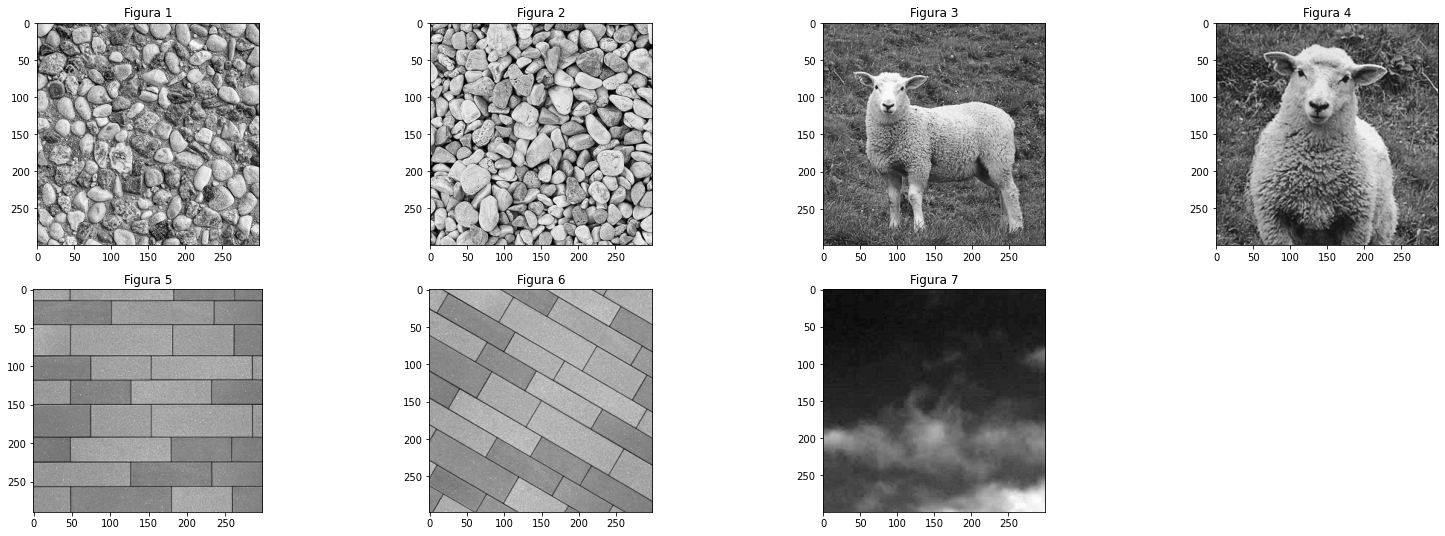

In [ ]:
images = [piedras1, 
piedras2, 
oveja1, 
oveja2, 
ladrillos1, 
ladrillos2, 
cielo] 
image_plot(images, n_row = 2, n_col = 4, fig_size = (27, 9))

La función **basic_LBP** recibe una imagen como argumento, implementa el algorítmo local binary patterns y devuelve el resultado del cálculo.

In [73]:
def basic_LBP(img):

  out = np.zeros((img.shape[0]-2, img.shape[1]-2))
  for y in np.arange(1, img.shape[0]-1):
    for x in np.arange(1, img.shape[1]-1):

      b0 = img[y, x]
      b1 = (img[y-1, x] >= img[y, x]) * 2
      b2 = (img[y-1, x+1] >= img[y, x]) * 4
      b3 = (img[y, x+1] >= img[y, x]) * 8
      b4 = (img[y+1, x+1] >= img[y, x]) * 16
      b5 = (img[y+1, x] >= img[y, x]) * 32
      b6 = (img[y+1, x-1] >= img[y, x]) * 64
      b7 = (img[y, x-1] >= img[y, x]) * 128
      b8 = (img[y-1, x-1] >= img[y, x]) * 256

      out[y-1, x-1] = b1 + b2 + b3 + b4 + b5 + b6 + b7 + b8

  return out


In [74]:
images_LBP = []
j = 0
for i in images:
  print(j)
  j=j+1
  images_LBP.append(basic_LBP(i))

0
1
2
3
4
5
6


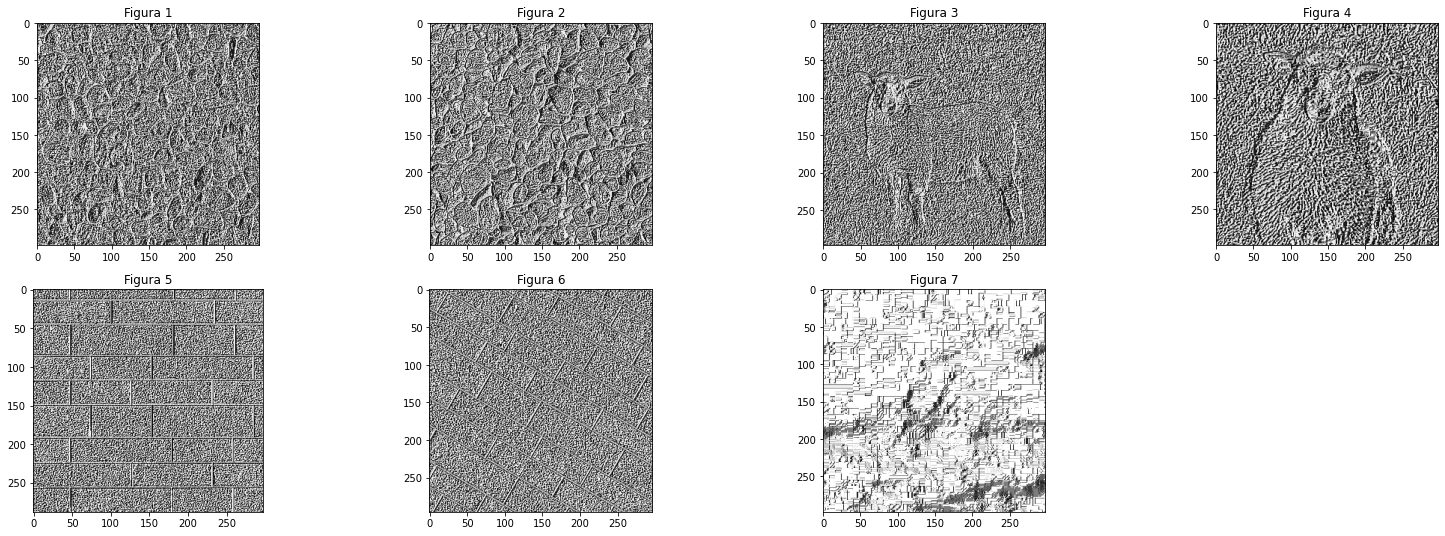

In [75]:
image_plot(images_LBP, n_row = 2, n_col = 4, fig_size = (27, 9))

In [80]:
# Cálculo de histogramas
images_histograms = []
for i in images:
  images_histograms.append(np.histogram(i.ravel(),bins=256,range=[0,256])[0])

imagesLBP_histograms = []
for i in images_LBP:
  imagesLBP_histograms.append(np.histogram(i.ravel(),bins=256,range=[0,256])[0])


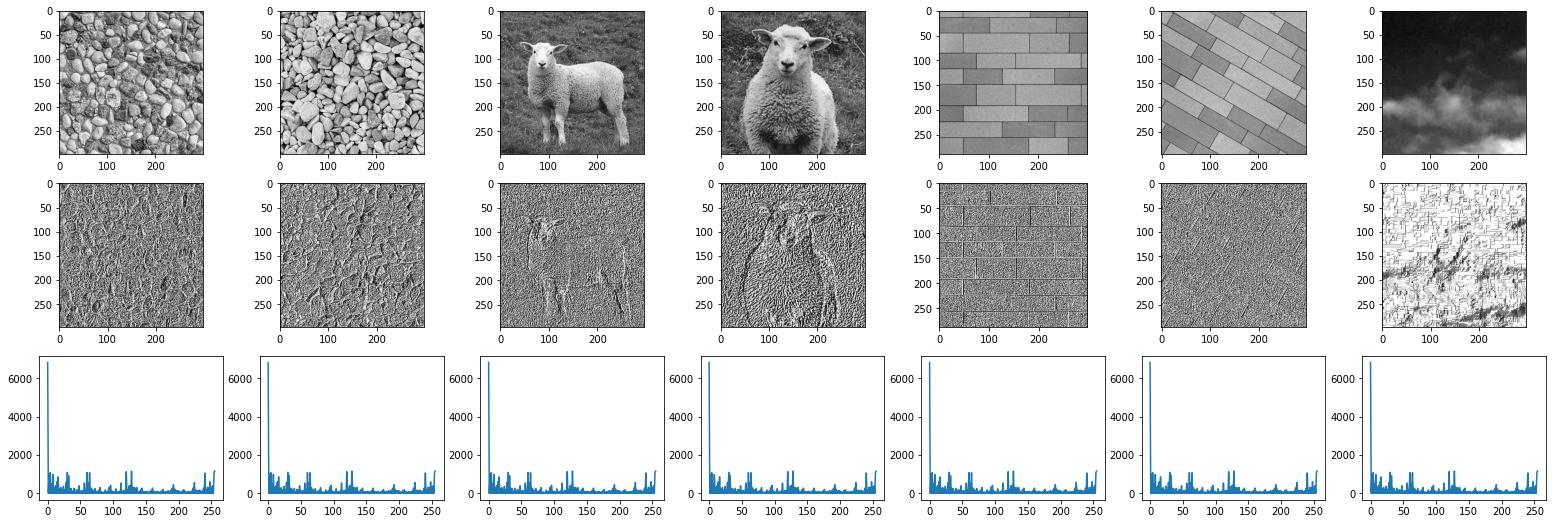

In [99]:
fig, axs = plt.subplots(3, len(images), figsize = (27 , 9))
for i in np.arange(0, len(images)):
  plt.subplot(3,len(images),i + 1)
  plt.imshow(images[i], cmap = 'gray')


  plt.subplot(3,len(images),i + 1 + len(images))
  plt.imshow(images_LBP[i], cmap = 'gray')

  plt.subplot(3,len(images),i + 1 + len(images) * 2)
  plt.plot(imagesLBP_histograms[1])